In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [165]:

# Real time price data at frequency of 5 mins across 3 zones 
# Frequency converted to every 10mins to match sunshine data
pricedata = pd.read_csv('Data/caiso_lmp_rt_5min_zones_2023Q1.csv', skiprows=3)
pricedata.rename(columns={'Local Timestamp Pacific Time (Interval Beginning)':'begin_time'}, inplace=True)
pricedata['begin_time'] = pd.to_datetime(pricedata['begin_time'])
pricedata = pricedata[pricedata['begin_time'].apply(lambda x: x.minute % 10 == 0)]

# Electricity generation data by source type at frequency of 5 mins
# Frequency converted to every 10mins to match sunshine data
gendata = pd.read_csv('Data/caiso_gen_all_5min_2023Q1.csv', skiprows=3)
gendata.rename(columns={'Local Timestamp Pacific Time (Interval Beginning)':'begin_time'}, inplace=True)
gendata['begin_time'] = pd.to_datetime(gendata['begin_time'])
gendata = gendata[gendata['begin_time'].apply(lambda x: x.minute % 10 == 0)]
gendata['solar_scaled'] = gendata.apply(lambda x: x['Solar Generation (MW)']/20 , axis=1)
gendata = gendata[gendata.apply(lambda x : x['solar_scaled']>0, axis=1)]

# Solar footprints file in data folder gives areas of solar farms, Riverside county seems to have two large solar farms so selected that for sunshine data

riverside_sunshine_data = pd.read_csv('Data/riverside.csv', skiprows=2)
riverside_sunshine_data['begin_time'] = riverside_sunshine_data.apply(lambda x: datetime.datetime(int(x['Year']), int(x['Month']), int(x['Day']), int(x['Hour']), int(x['Minute']),0) , axis=1)

kings_sunshine_data = pd.read_csv('Data/kings.csv', skiprows=2)
kings_sunshine_data['begin_time'] = kings_sunshine_data.apply(lambda x: datetime.datetime(int(x['Year']), int(x['Month']), int(x['Day']), int(x['Hour']), int(x['Minute']),0) , axis=1)


In [166]:
# Get data between specified dates
def filter_times(df, time1, time2):
    return df.apply(lambda x: (time1 <= x['begin_time']) and (x['begin_time'] <= time2) , axis=1)

In [167]:
#Combine solar generation and prices dataframes

solar_gendata = gendata[['begin_time', 'solar_scaled']]
pricedata = pricedata[['begin_time', 'NP-15 LMP', 'SP-15 LMP', 'ZP-26 LMP']]
solargen_price_combined = solar_gendata.merge(pricedata, on='begin_time')

In [ ]:
#Get daily averages

avgs = solargen_price_combined.groupby(solargen_price_combined['begin_time'].apply(lambda x: x.date()), sort=False)[['solar_scaled', 'NP-15 LMP', 'SP-15 LMP', 'ZP-26 LMP']].mean()
avgs.iloc[5:25]

,solar_scaled,NP-15 LMP,SP-15 LMP,ZP-26 LMP
begin_time,,,,
2023-01-06,338.073770,93.610989,90.888743,91.487103
2023-01-09,107.481356,168.038585,161.176921,165.224592
2023-01-10,245.125424,108.065849,106.767223,105.413104
2023-01-11,0.850000,143.778380,150.367520,144.638500
2023-01-12,272.411290,92.650830,89.342279,89.734784
2023-01-13,217.475410,141.356746,120.650799,124.354809
2023-01-14,62.375000,169.364828,181.996713,171.185711
2023-01-15,124.118966,156.028927,153.121798,152.954251
2023-01-16,211.058824,125.184315,124.932585,122.710774


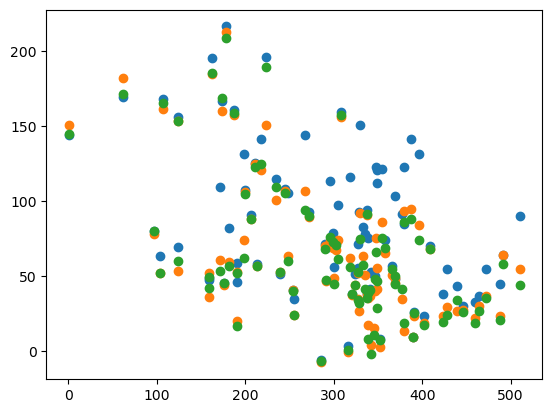

In [ ]:
#Plot solar generation vs prices

plt.scatter(avgs['solar_scaled'], avgs['NP-15 LMP'])
#plt.scatter(avgs['solar_scaled'], avgs['SP-15 LMP'])
#plt.scatter(avgs['solar_scaled'], avgs['ZP-26 LMP'])

plt.show()

In [180]:
avgs['solar_scaled']

begin_time
2023-01-01    199.658824
2023-01-02    162.255422
2023-01-03    308.621186
2023-01-04    174.082759
2023-01-05    187.877500
                 ...    
2023-03-27    401.908553
2023-03-28    377.618125
2023-03-29    333.537662
2023-03-30    338.586029
2023-03-31    341.859211
Name: solar_scaled, Length: 88, dtype: float64

In [188]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(avgs['solar_scaled'].values.reshape(-1,1), avgs['NP-15 LMP'].values)

linreg.coef_

array([-0.19019823])

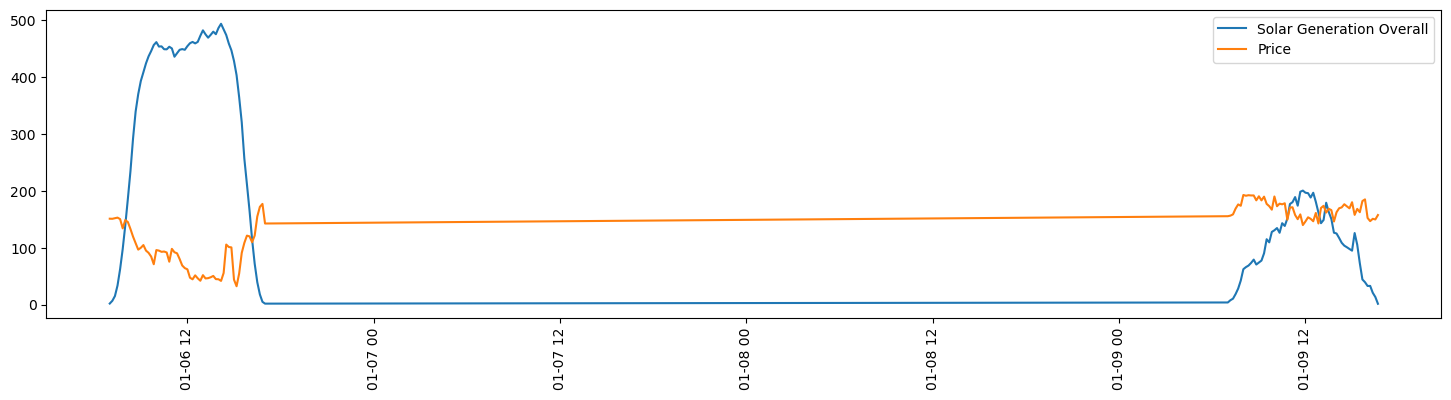

In [170]:
time1 = datetime.datetime(2023, 1, 6, 0, 0, 0)
time2 = datetime.datetime(2023, 1, 10, 0, 0, 0)

filtered_data = gen_price_comb[filter_times(gen_price_comb, time1, time2)]

plt.figure(figsize=(18, 4))
plt.plot(filtered_data['begin_time'], filtered_data['solar_scaled'] , label='Solar Generation Overall')
plt.plot(filtered_data['begin_time'], filtered_data['NP-15 LMP'] , label='Price')
#plt.plot(np_pricedata[filter_times(np_pricedata, time1, time2)]['begin_time'], np_pricedata[filter_times(np_pricedata, time1, time2)]['NP-15 LMP'])
#plt.plot(riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['begin_time'], riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['Clearsky DHI'], label='Riverside DHI')
#plt.plot(riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['begin_time'], riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['DNI'], label='Riverside DNI')
#plt.plot(riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['begin_time'], riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['Clearsky GHI'], label='Riverside GHI')
#plt.plot(kings_sunshine_data[filter_times(kings_sunshine_data, time1, time2)]['begin_time'], kings_sunshine_data[filter_times(kings_sunshine_data, time1, time2)]['DNI'], label='Kings DNI')
#plt.plot(kings_sunshine_data[filter_times(kings_sunshine_data, time1, time2)]['begin_time'], kings_sunshine_data[filter_times(kings_sunshine_data, time1, time2)]['Clearsky DNI'], label='Clearsky Kings DNI')

plt.xticks(rotation=90)
plt.legend()
plt.show()

In [174]:
# DHI, DNI and GHI are different kinds of radiation
riverside_sunshine_data[['begin_time', 'DNI']][riverside_sunshine_data.apply(lambda x: x['DNI']>0, axis=1)]

,begin_time,DNI
188,2023-01-02 07:20:00,1
189,2023-01-02 07:30:00,1
190,2023-01-02 07:40:00,2
191,2023-01-02 07:50:00,2
192,2023-01-02 08:00:00,3
...,...,...
52505,2023-12-31 14:50:00,2
52506,2023-12-31 15:00:00,6
52507,2023-12-31 15:10:00,1
52508,2023-12-31 15:20:00,1


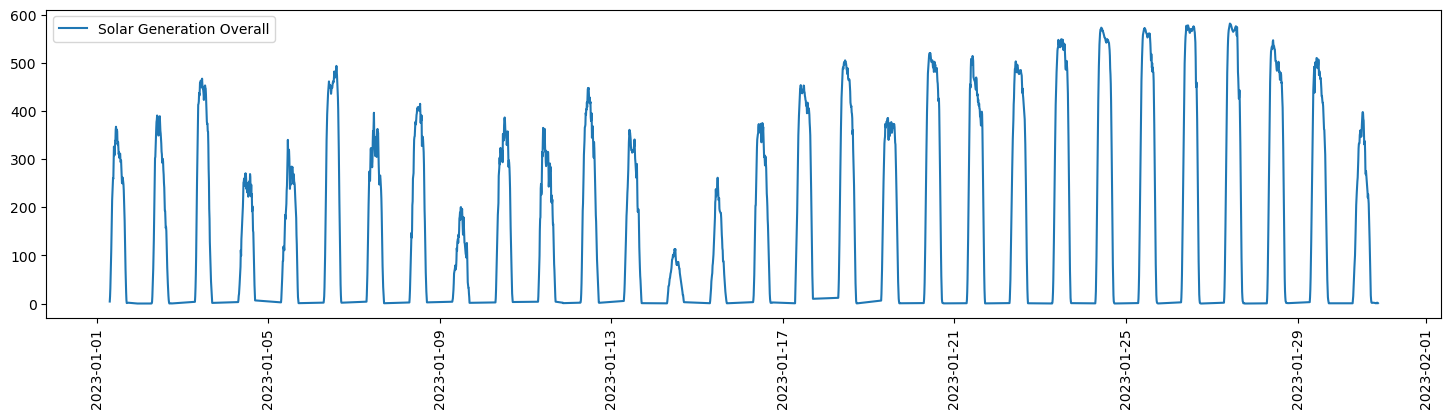

In [175]:
time1 = datetime.datetime(2023, 1, 1, 0, 0, 0)
time2 = datetime.datetime(2023, 1, 31, 0, 0, 0)

plt.figure(figsize=(18, 4))
plt.plot(gendata[filter_times(gendata, time1, time2)]['begin_time'], gendata[filter_times(gendata, time1, time2)]['solar_scaled'], label='Solar Generation Overall')
#plt.plot(pricedata[filter_times(pricedata, time1, time2)]['begin_time'], pricedata[filter_times(pricedata, time1, time2)]['NP-15 LMP'])
#plt.plot(riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['begin_time'], riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['Clearsky DHI'], label='Riverside DHI')
#plt.plot(riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['begin_time'], riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['DNI'], label='Riverside DNI')
#plt.plot(riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['begin_time'], riverside_sunshine_data[filter_times(riverside_sunshine_data, time1, time2)]['Clearsky GHI'], label='Riverside GHI')
#plt.plot(kings_sunshine_data[filter_times(kings_sunshine_data, time1, time2)]['begin_time'], kings_sunshine_data[filter_times(kings_sunshine_data, time1, time2)]['DNI'], label='Kings DNI')
#plt.plot(kings_sunshine_data[filter_times(kings_sunshine_data, time1, time2)]['begin_time'], kings_sunshine_data[filter_times(kings_sunshine_data, time1, time2)]['Clearsky DNI'], label='Clearsky Kings DNI')

plt.xticks(rotation=90)
plt.legend()
plt.show()

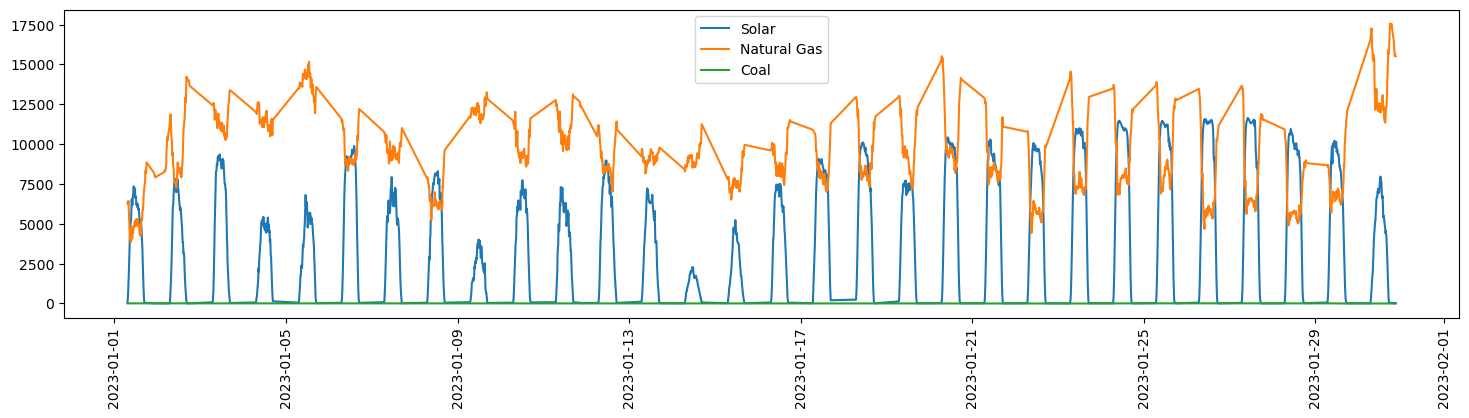

In [177]:
plt.figure(figsize=(18, 4))
plt.plot(gendata[filter_times(gendata, time1, time2)]['begin_time'], gendata[filter_times(gendata, time1, time2)]['Solar Generation (MW)'], label='Solar')
plt.plot(gendata[filter_times(gendata, time1, time2)]['begin_time'], gendata[filter_times(gendata, time1, time2)]['Natural Gas Generation (MW)'], label='Natural Gas')
plt.plot(gendata[filter_times(gendata, time1, time2)]['begin_time'], gendata[filter_times(gendata, time1, time2)]['Coal Generation (MW)'], label='Coal')


plt.xticks(rotation=90)
plt.legend()
plt.show()